<a href="https://colab.research.google.com/github/Batman511/Numerical_methods_6sem/blob/main/4)%D0%A3%D1%80%D0%B0%D0%B2%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BF%D0%B5%D1%80%D0%B5%D0%BD%D0%BE%D1%81%D0%B0ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

## Линейный перенос

In [3]:
f = lambda u,koef_a: koef_a * u
a = lambda u,koef_a: koef_a
phi = lambda x: np.heaviside(x - 1, 1) * np.heaviside(2 - x, 1)

def next_line(u, x_range, h, tau, const):
    line = np.zeros(len(x_range))
    for i in range(1, len(x_range) - 1):
        line[i] = 1/2 *(u[i+1] + u[i-1]) - tau/(2*h) * (f(u[i+1], const) - f(u[i-1], const))
        
    return line

In [5]:
xmin = 0
xmax = 10
koef_a = 4
h = 0.01

# C должно быть <= 1
C = 0.9
tau = (C * h) / koef_a

xn = np.arange(xmin, xmax + h, h)
u1 = phi(xn)
u2 = next_line(u1, xn, h, tau, koef_a)

# гиф
def init():
    line.set_data([], [])
    return line,

def animate(i):
    global u1,u2
    if i == 0:
        y = u1
    elif i == 1:
        y = u2
    else:
        u1 = np.copy(u2)
        tau = (C * h) / koef_a
        u2 = next_line(u1, xn, h, tau, koef_a)
        y = u2

    line.set_data(xn, y)
    return line,

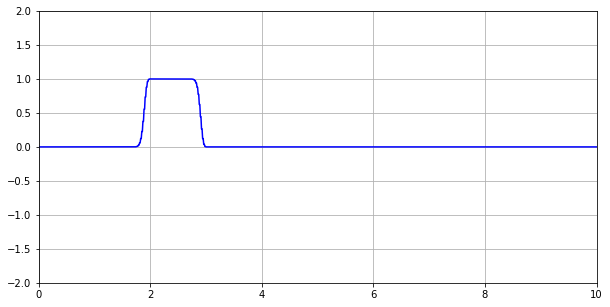

In [6]:
fig = plt.figure(figsize=(10,5))
ax = plt.axes(xlim=(0, 10), ylim=(-2, 2))
ax.grid(True)
line, = ax.plot([], [], color = 'blue')

anim1 = FuncAnimation(fig, animate, init_func=init,
                      frames=100, interval=50, blit=True)

anim1.save('wave_1.gif', writer='pillow')  

## Нелинейный перенос с разрывом

In [7]:
f = lambda u,koef_a: u**2/2
a = lambda u,koef_a: u
phi = lambda x: (np.sin(np.pi*x/2))**2 * np.heaviside(x, 1)*np.heaviside(2 - x, 1)

#проще запускать заново целый блок
def next_line(u, x_range, h, tau, const):
    line = np.zeros(len(x_range))
    for i in range(1, len(x_range) - 1):
        line[i] = 1/2 *(u[i+1] + u[i-1]) - tau/(2*h) * (f(u[i+1], const) - f(u[i-1], const))
        
    return line

In [9]:
xmin = 0
xmax = 10
koef_a = 4
h = 0.01

# C должно быть <= 1
C = 0.9

xn = np.arange(xmin, xmax + h, h)
u3 = phi(xn)

tau = (C * h) / max(a(u3,koef_a))
u4 = next_line(u3, xn, h, tau, koef_a)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    global u3,u4
    if i == 0:
        y = u3
    elif i == 1:
        y = u4
    else:
        u3 = np.copy(u4)
        tau = (C * h) / max(a(u3,koef_a))
        u4 = next_line(u3, xn, h, tau, koef_a)
        y = u4

    line.set_data(xn, y)
    return line,

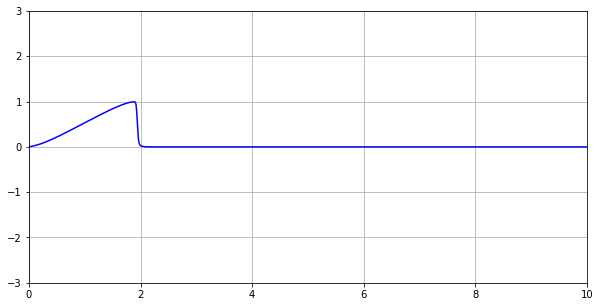

In [10]:
fig = plt.figure(figsize=(10,5))
ax = plt.axes(xlim=(0, 10), ylim=(-3, 3))
ax.grid(True)
line, = ax.plot([], [], color = 'blue')


anim1 = FuncAnimation(fig, animate, init_func=init,
                      frames=100, interval=50, blit=True)

anim1.save('wave_2.gif', writer='pillow')